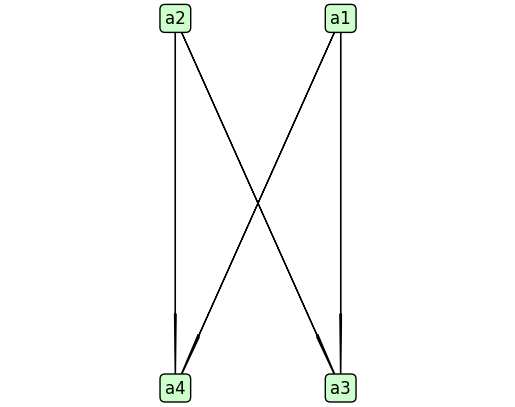

π(a,b):
 [[0.       0.3      0.366667 0.433333]
 [0.279487 0.       0.546154 0.312821]
 [0.18     0.3      0.       0.3     ]
 [0.133333 0.06     0.5      0.      ]]

phi+ : [0.366667 0.379487 0.26     0.231111]
phi- : [0.197607 0.22     0.47094  0.348718]

cp (P+/I/R):
 [['-' 'R' 'P+' 'P+']
 ['R' '-' 'P+' 'P+']
 ['-' '-' '-' 'R']
 ['-' '-' 'R' '-']]


In [2]:
import numpy as np
from pyDecision.algorithm.p_i import preference_degree, promethee_i

# =========================
# Datos de entrada
# =========================
alts  = ["A", "B", "C", "D"]
types = np.array([-1, 1, -1, -1], dtype=float)

X = np.array([
    #  g1     g2     g3     g4
    [100.0,   70.0,   45.0,   7.0],  # A
    [150.0,   72.0,   40.0,   4.0],  # B
    [80.0,   55.0,   45.0,   8.0],  # C
    [140.0,   65.0,   45.0,   5.0],  # D
], dtype=float)

w = np.array([0.30, 0.30, 0.20, 0.20], dtype=float)
q = np.array([5, 1, 2, 0], dtype=float)
p = np.array([30, 10, 15, 3], dtype=float)

# Parámetro S (solo se usa en gaussian/otras); aquí no se usa
S = np.zeros(4, dtype=float)

# Función por criterio (t5 = V-shape con indiferencia q,p)
F = ["t5", "t5", "t5", "t5"]

# Convertir todo a maximizar
dataset = X * types
n = len(alts)

# PASO 3: matriz π(a,b)
pi = preference_degree(dataset, w, q, S, p, F)
np.fill_diagonal(pi, 0.0)

# PASO 4: flujos
phi_plus  = pi.sum(axis=1) / (n - 1)
phi_minus = pi.sum(axis=0) / (n - 1)

# PASO 5: relación PROMETHEE I (P+, I, R)
cp = promethee_i(dataset, w, q, S, p, F, graph=True)

print("π(a,b):\n", np.round(pi, 6))
print("\nphi+ :", np.round(phi_plus, 6))
print("phi- :", np.round(phi_minus, 6))
print("\ncp (P+/I/R):\n", cp)